In [1]:
#importing all the module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sensor = pd.read_csv('sensor3.csv')

In [3]:
sensor.drop(['Unnamed: 0'],axis=1, inplace=True)

In [4]:
sensor.head()

,dt,sensor,con,spl,date,time
0,2016-06-21 00:00:00,sensor_3,1686.44125,76.235738,2016-06-21,00:00:00
1,2016-06-21 04:00:00,sensor_3,2041.33000,79.445869,2016-06-21,04:00:00
2,2016-06-21 08:00:00,sensor_3,2369.71750,80.738609,2016-06-21,08:00:00
3,2016-06-21 12:00:00,sensor_3,1985.25625,81.861684,2016-06-21,12:00:00
4,2016-06-21 16:00:00,sensor_3,2255.37750,79.675113,2016-06-21,16:00:00


C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  if __name__ == '__main__':


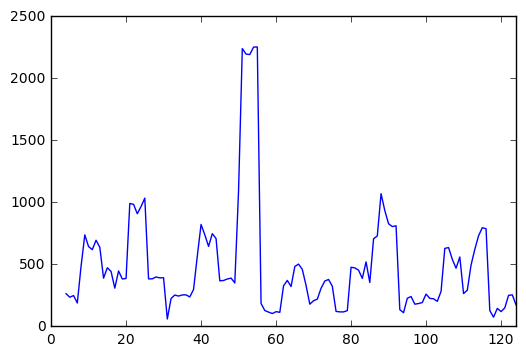

In [5]:
pd.stats.moments.rolling_std(sensor.con,5).plot()

C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  if __name__ == '__main__':


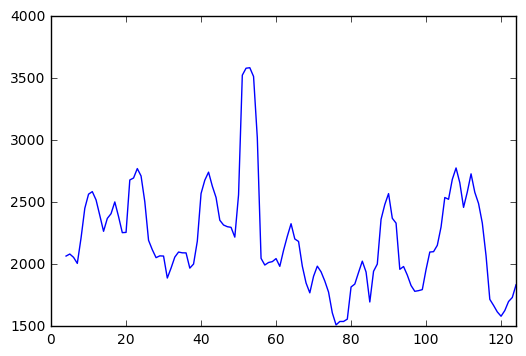

In [6]:
pd.stats.moments.rolling_mean(sensor.con,5).plot()

In [7]:
import statsmodels.api as sm

In [8]:
sm.tsa.adfuller(sensor.con)

(-6.8786427859247548,
 1.4525348494859201e-09,
 1L,
 123L,
 {'1%': -3.4846672514209773,
  '10%': -2.5794629869786503,
  '5%': -2.8853397507076006},
 1762.3383039486303)

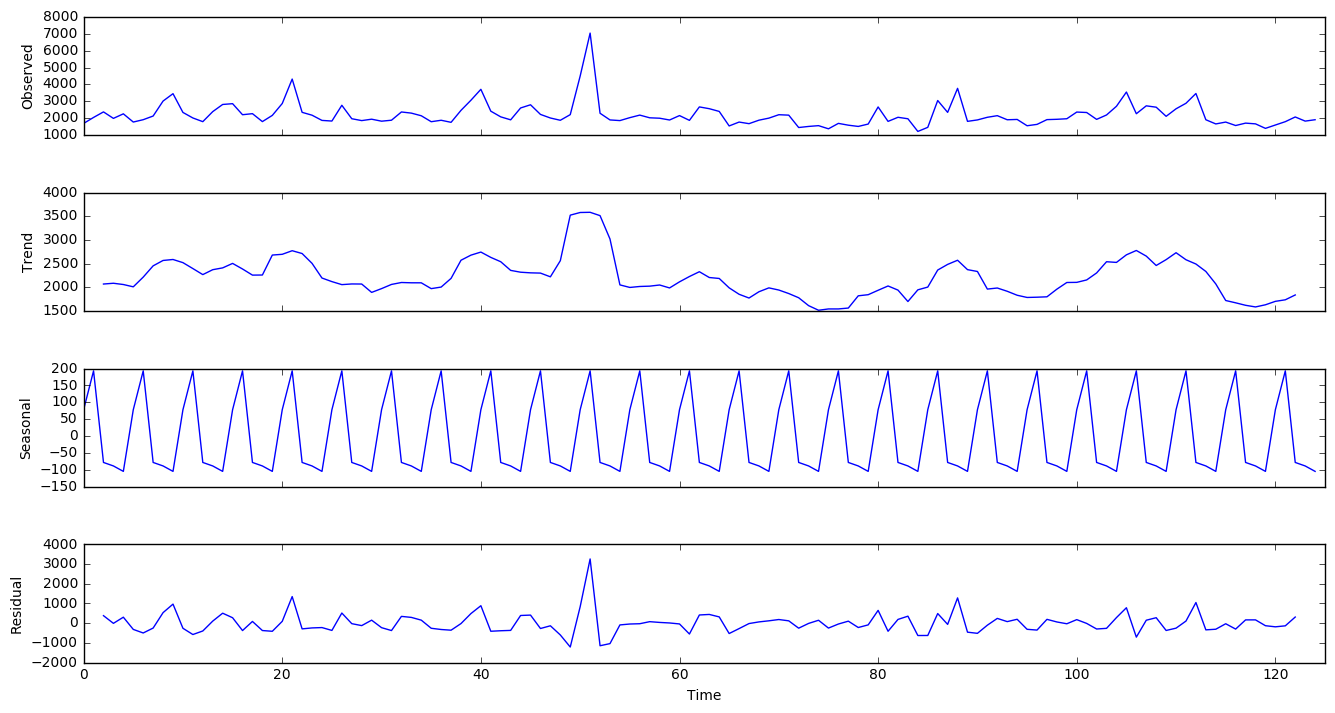

In [27]:
data_con = np.array(sensor.con)
decomposition = sm.tsa.seasonal_decompose(data_con, freq=5)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [10]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

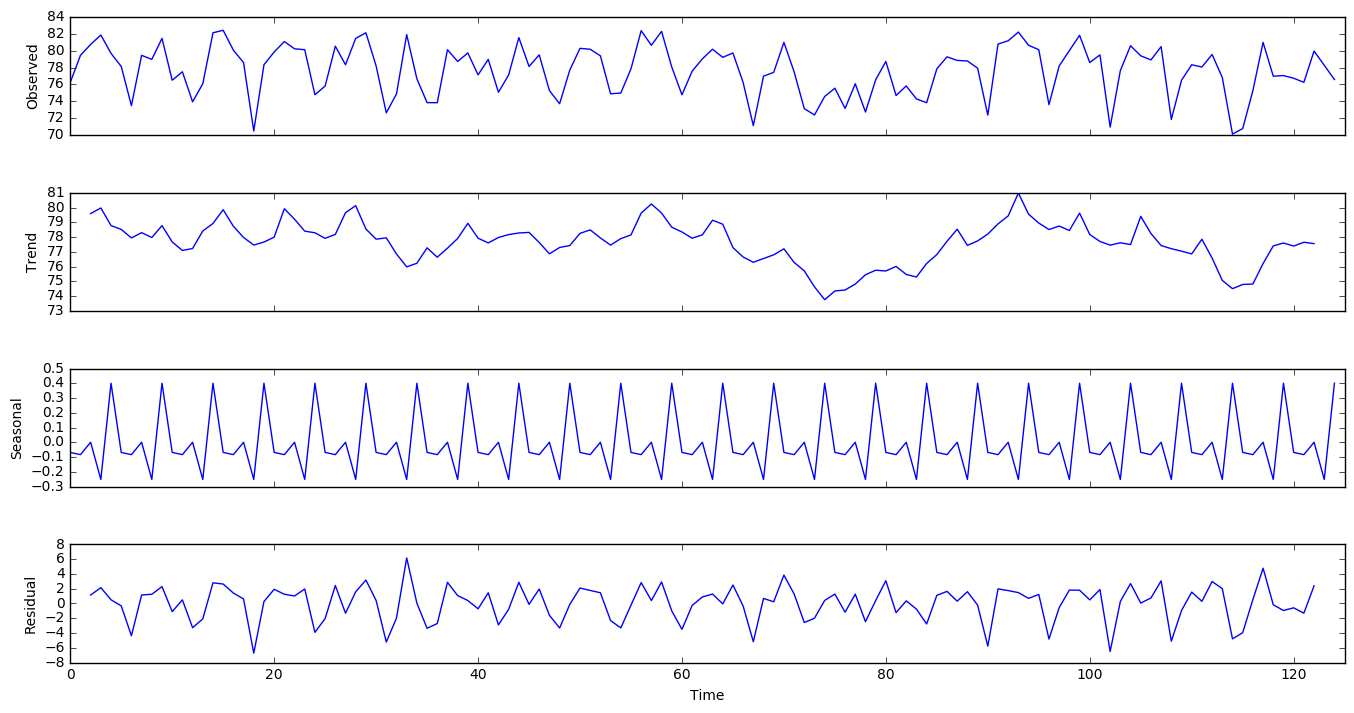

In [11]:
data_spl = np.array(sensor.spl)
decomposition = sm.tsa.seasonal_decompose(data_spl, freq=5)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [12]:
sensor_con_date = sensor[['date', 'con']].groupby('date').sum()
sensor_spl_date = sensor[['date', 'spl']].groupby('date').sum()

In [13]:
data_con_date = np.array(sensor_con_date.con)

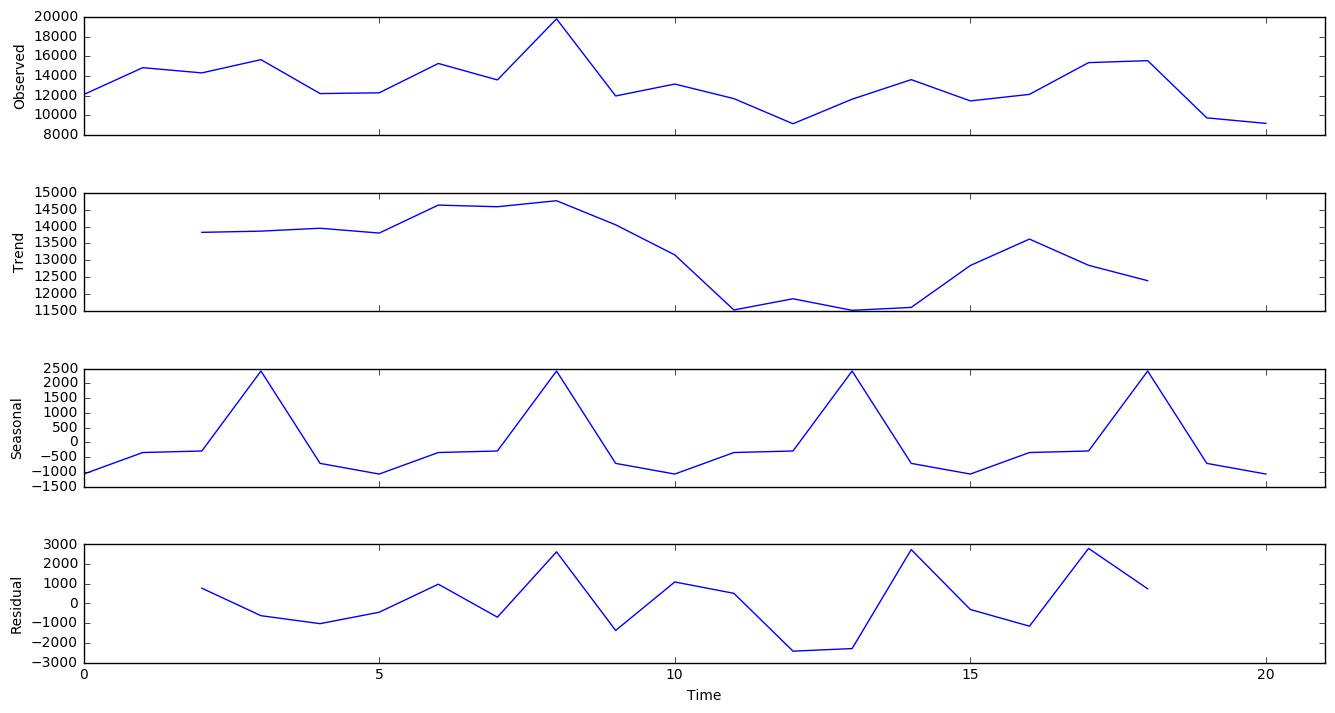

In [14]:
decomposition = sm.tsa.seasonal_decompose(data_con_date, freq=5)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [15]:
data_spl_date = np.array(sensor_spl_date.spl)

In [16]:
sensor_spl_date.index

Index([u'2016-06-21', u'2016-06-22', u'2016-06-23', u'2016-06-24',
       u'2016-06-25', u'2016-06-26', u'2016-06-27', u'2016-06-28',
       u'2016-06-29', u'2016-06-30', u'2016-07-01', u'2016-07-02',
       u'2016-07-03', u'2016-07-04', u'2016-07-05', u'2016-07-06',
       u'2016-07-07', u'2016-07-08', u'2016-07-09', u'2016-07-10',
       u'2016-07-11'],
      dtype='object', name=u'date')

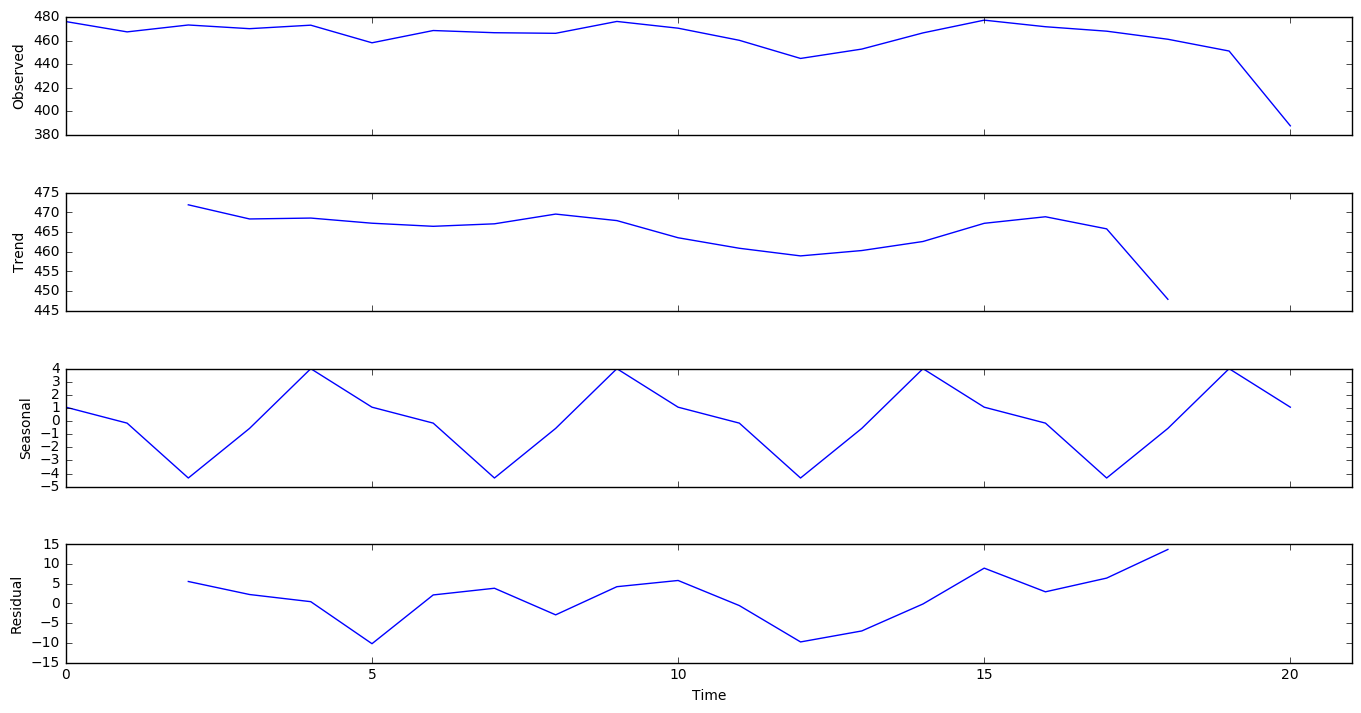

In [17]:
decomposition = sm.tsa.seasonal_decompose(data_spl_date, freq=5)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [18]:
dta = sm.datasets.co2.load_pandas().data

In [19]:
dta = sm.datasets.co2.load_pandas().data

In [20]:
dta.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')